In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stat
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans

In [2]:
auto_df = pd.read_csv("data\\auto-mpg.csv")

In [3]:
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [5]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
auto_df = auto_df.drop("car name", axis = 1)

In [7]:
auto_df["hp"].sort_values(ascending=True)

133    100
98     100
256    100
107    100
334    100
      ... 
126      ?
374      ?
354      ?
32       ?
336      ?
Name: hp, Length: 398, dtype: object

In [8]:
def updatehp_text(hp):
    if hp == "?":
        return "-1"
    else:
        return hp
    
auto_df["hp"] = auto_df["hp"].apply(updatehp_text).sort_values(ascending=True)

In [9]:
auto_df["hp"] = auto_df["hp"].astype("int64") 

In [10]:
def updatehp_avg(hp):
    if hp == -1:
        return np.average(auto_df[auto_df["hp"] != -1]["hp"])
    else:
        return hp

In [11]:
auto_df["hp"] = auto_df["hp"].apply(updatehp_avg)

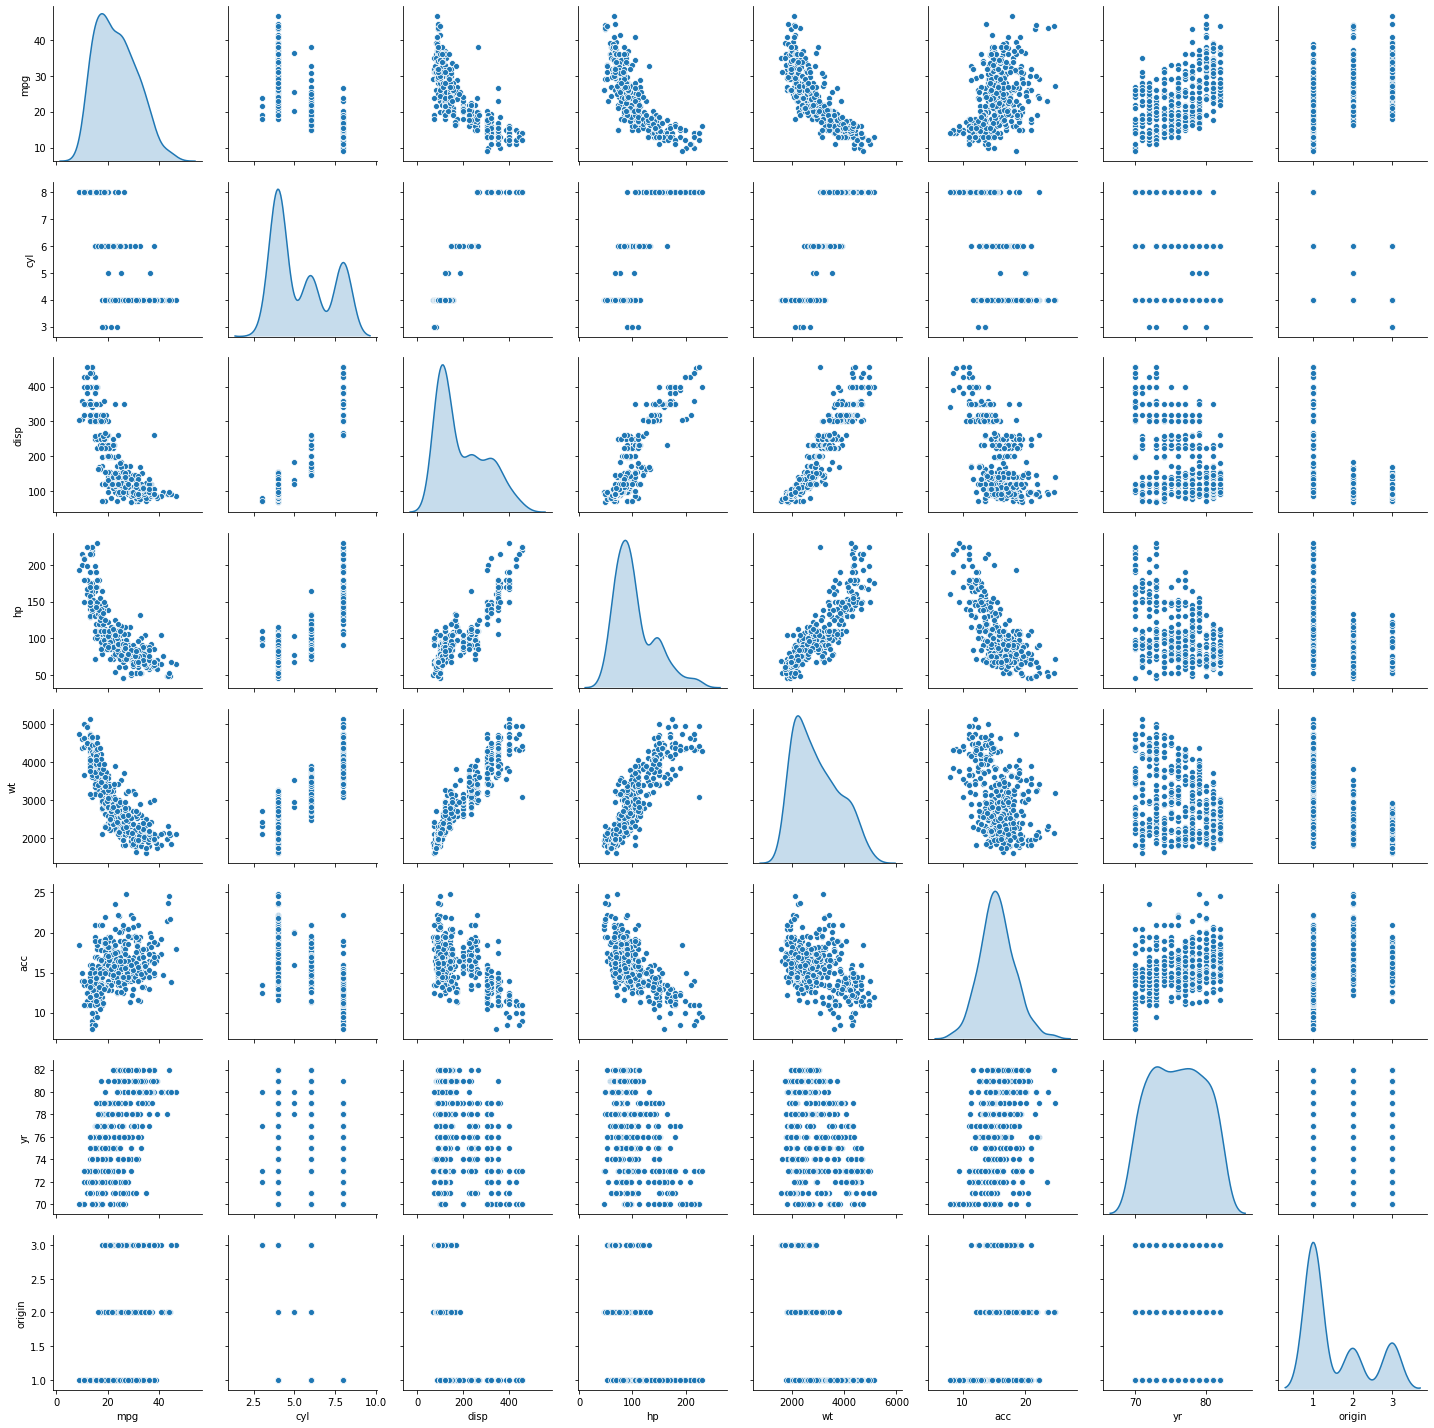

In [12]:
sns.pairplot(auto_df, diag_kind = "kde")

In [13]:
auto_df_z = auto_df.loc[:,"mpg":"origin"]

In [14]:
auto_df_z = auto_df_z.apply(stat.zscore)

In [15]:
auto_df_z.pop("origin")
auto_df_z.pop("yr")

0     -1.627426
1     -1.627426
2     -1.627426
3     -1.627426
4     -1.627426
         ...   
393    1.621983
394    1.621983
395    1.621983
396    1.621983
397    1.621983
Name: yr, Length: 398, dtype: float64

In [16]:
array = auto_df_z.values

In [17]:
x = auto_df_z.iloc[:,1:5]
y = auto_df_z.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [18]:
from sklearn import svm
svr = svm.SVR()
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = svr.predict(x_test)

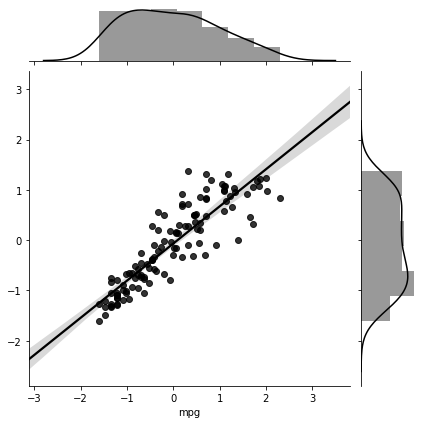

In [20]:
sns.jointplot(x = y_test, y = y_pred, kind = "reg", color = "k")

In [21]:
auto_df_z = auto_df_z.drop ("acc", axis = 1)

In [22]:
x = auto_df_z.iloc [:,1:5]
y = auto_df_z.iloc [:,0]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [24]:
svr = svm.SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

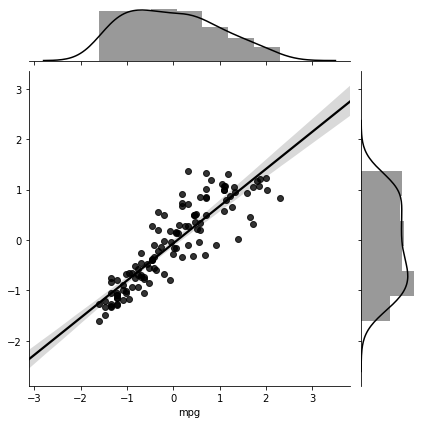

In [25]:
sns.jointplot(x = y_test, y = y_pred, kind = "reg", color = "k")

In [26]:
c_range = range(2,9)
cluster_err = []
for num_cluster in c_range:
    clusters = KMeans(num_cluster, n_init=5)
    clusters.fit(auto_df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_err.append(clusters.inertia_)
cluster_df = pd.DataFrame({"num_clusters":c_range, "cluster_errors":cluster_err})
cluster_df[0:15]

,num_clusters,cluster_errors
0,2,637.657177
1,3,355.159991
2,4,255.517366
3,5,205.486403
4,6,184.429856
5,7,167.062236
6,8,153.393785


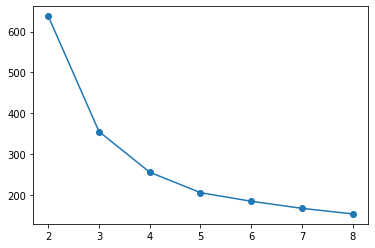

In [27]:
plt.plot (cluster_df["num_clusters"], cluster_df["cluster_errors"], marker = "o")

In [28]:
kmeans = KMeans(4, n_init=5)

In [29]:
kmeans.fit(auto_df_z)
labels = kmeans.labels_
auto_df_z ["cluster"] = labels

In [30]:
centroids = kmeans.cluster_centers_

In [31]:
centroid_df = pd.DataFrame(centroids, columns = list (auto_df_z.drop("cluster", axis = 1).columns))

In [32]:
centroid_df

,mpg,cyl,disp,hp,wt
0,-1.144105,1.498191,1.496288,1.492022,1.393080
1,1.354336,-0.838301,-0.919665,-0.929188,-1.047347
2,-0.475995,0.393687,0.274493,-0.059581,0.306004
3,0.180850,-0.861484,-0.696865,-0.424236,-0.523887


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C42423A3C8>,
      dtype=object)

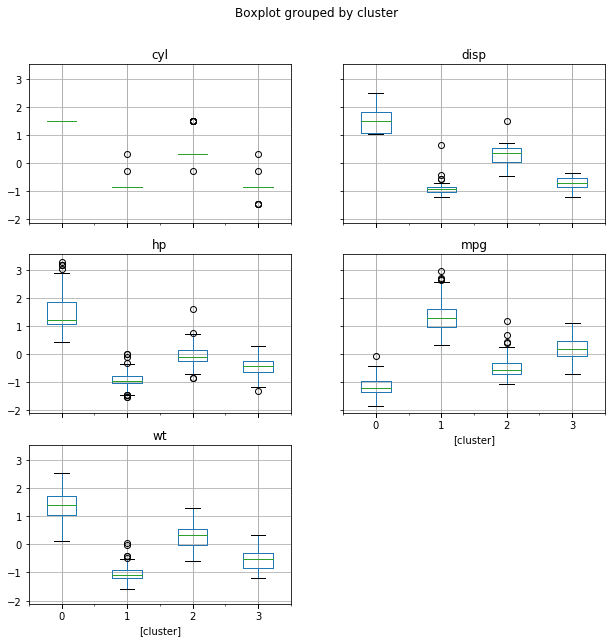

In [33]:
auto_df_z.boxplot(by = "cluster", figsize = (10,10))

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [36]:
auto_df.pop("yr")
auto_df.pop("origin")

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [37]:
auto_df.head()

,mpg,cyl,disp,hp,wt,acc
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


In [38]:
auto_df = auto_df.apply(stat.zscore)

In [39]:
d_reg = DecisionTreeRegressor(max_depth = 2)
x = auto_df.iloc[:,1:]
y = auto_df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =1)

In [40]:
d_reg.fit(x_train, y_train)
y_pred = d_reg.predict(x_test)
d_reg.score(x_test, y_test)

0.7222023731005149

In [41]:
pd.DataFrame([x_train.columns, d_reg.feature_importances_]).transpose()

,0,1
0,cyl,0.791307
1,disp,0
2,hp,0.208693
3,wt,0
4,acc,0


In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(degree = 2, interaction_only= True)

In [44]:
x_poly = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 3, random_state = 1)

In [45]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha = 0.3)
ridge.fit(x_train, y_train)
print(ridge.score(x_test, y_test))
lasso = Lasso(alpha = 0.2)
lasso.fit(x_train, y_train)
print(lasso.score(x_test, y_test))

0.10553728861572098
0.008227752563039425
